# Input Data

This section reads the data from the second column of nb_data.csv file and prints the first 200 elements along with mean, variance and over disperssion factor (assuming: mean>0 and var>mean). The dataset that is used is the total number of observed crashes for a sample of urban four-leg signalized intersections of South Carolina.

In [6]:
d = read.csv('nb_data.csv')
d = d[,2]
# Summary Stats
m = mean(d)
v = var(d)
k = (v-m)/m^2
theta = 1/k
print(d[1:min(200,length(d))])
print(paste0('Mean:',prettyNum(m)))
print(paste0('Var:',prettyNum(v)))
print(paste0('Overdisperssion: ',prettyNum(k)))

  [1]  1 11  0  1  1  1  2  1  4  1  7  4  9  6  3  9 27  5  0 20 20  4  2  6  0
 [26]  2  1  4 13  3  2  2  1  0  1  0  8 25  7 11 12  9 15 17  3  0  1  0 25 27
 [51]  0  0  1  5  3  6  2  4 10  0  0  7 15  7  9 27  4  3  7  1  8  3  0 20 25
 [76] 27  7 10  2 17  3  4  7  0  0  3  3  4  7 12 55  0 24  1  0  6  6  1 20 15
[101] 11  0  3 11  1  8  0  3  5 28  2  0 11  6 11  4 12  1  6  8  2  0  1 25  0
[126] 25  9  9  1 12  4  1  5 13  2  0  5  4  1  1  3 17  5  8  3  0  1  0  1  8
[151]  3  5 28 12  0  7  1  9  4  6  4 31 10  9  3  0  3  1  1  5  0  3  1  0  7
[176]  3 18  4  2 24  7  2
[1] "Mean:6.840659"
[1] "Var:67.9579"
[1] "Overdisperssion: 1.306074"


# Simulated data

This section generates a series of n random numbers (n=10,000) that have a distribution similar to the input data. The simulated numbers are saved in 'simulated.csv' file and the first 200 rows along with the mean, variance and overdisperssion factor are printed. 

In [7]:
n = 10000
# Equivalent NB parameters
library(MASS)
d_nb = rnegbin(n,m,theta)
write.csv(d_nb,'simulated.csv')
m_nb = mean(d_nb)
v_nb = var(d_nb)
k_nb = (v_nb-m_nb)/m_nb^2

print(d_nb[1:min(200,length(d))])
print(paste0('Mean:',prettyNum(m_nb)))
print(paste0('Var:',prettyNum(v_nb)))
print(paste0('Overdisperssion: ',prettyNum(k_nb)))

  [1]  8  5  7  8 20  0 12  0  1  2  6  0  8  6 10  9  2 21 18  8  8  1  1  2  7
 [26]  7  2  0 25  0  3  0  2  1  9 39  3  1 20  0  3  1  1 12 12 16  4  7 30 12
 [51]  0  2  8 15  6 18 24  1  2  3  2 16  0 15  1 11 10  5  1 13  2  1  1  2 28
 [76]  1  6  1 11  6  7  0  1  6  4  0  0  0 38 22 11  2  4  4  4 19  2  5  1  1
[101]  0 15 10 23  4  5  3  2  2  3  5  0  9  1  2  3  8 14 13  3 13  0  6  2  5
[126] 11 13  2  0  3 10  1  6 21  0 10 22  6  0  2 12  5 15 14 10  2 29  4  7  2
[151]  4 27  0  0 16 16  1 57  5  2  7  3  7  9  1  4  1  0  9 13  5  3  2  0  4
[176]  2  0  4  7  3  5  5
[1] "Mean:6.7631"
[1] "Var:65.85576"
[1] "Overdisperssion: 1.291939"


# Plot the Results

This section plots the histogram of input data, histogram of simulated data, and the probability mass function of the equivalent negative binomial distribution of the input data. The equivalent negative binomial distribution has the same mean and variance with the input data.

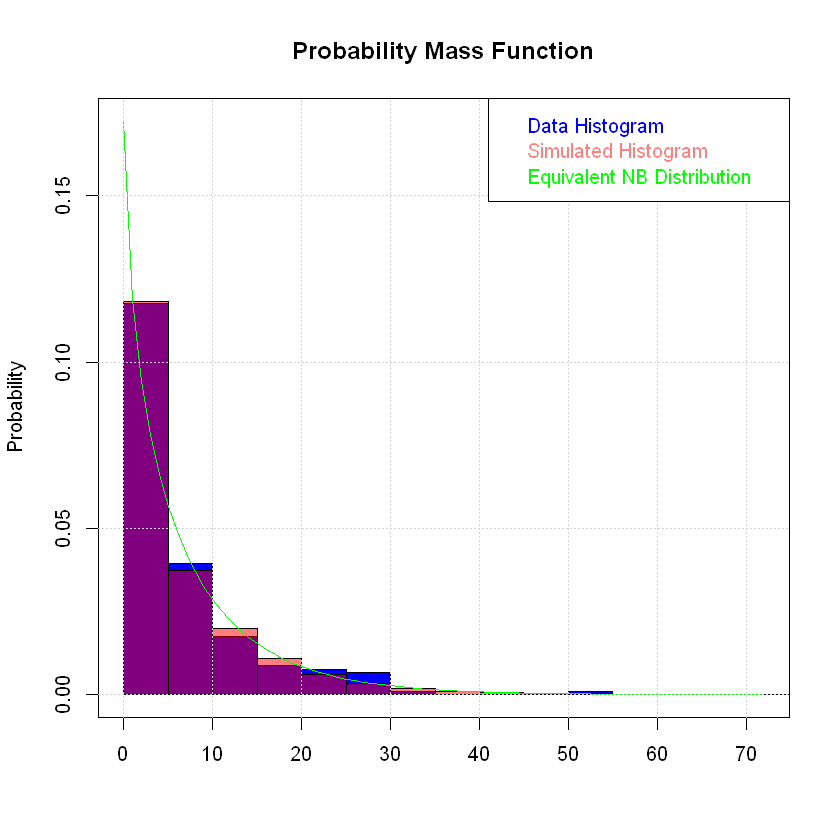

In [8]:
Cols = c(rgb(0, 0, 1, 1),rgb(1, 0, 0, 0.5),'green')
xr = range(d,d_nb)
x =  xr[1]:xr[2]

r = m^2/(v-m)
p = (v-m)/v
np_pdf = dnbinom(x,r,1-p)

d_prob = as.data.frame(table(d))$Freq/length(d)
d_nb_prob = as.data.frame(table(d_nb))$Freq/length(d_nb)

yr = range(d_prob,d_nb_prob,np_pdf)

hist(d,xlim=xr,ylim=yr,freq=F,main='Probability Mass Function',ylab='Probability',xlab='',col=Cols[1])

par(new=T)
hist(d_nb,freq=F,add=T,col=Cols[2])

par(new=T)
plot(x,y=np_pdf,xlim=xr,ylim=yr,type='l',col=Cols[3],xaxt='n',yaxt='n',xlab='',ylab='')

grid()
legend('topright',c('Data Histogram','Simulated Histogram','Equivalent NB Distribution'),text.col = Cols)